# <u>Activité</u> : La compression d'Huffman
<u>Sources</u> : https://tcharles.developpez.com/Huffman/ et https://towardsdatascience.com/huffman-decoding-cca770065bab

## <u>I/ Présentation de l'algorithme</u>

De nos jours, les espaces de stockage ne posent plus de problèmes. Il n'en est pas de même pour les flux de données sur les réseaux qui restent limités en débit malgré les avancées technologiques (fibre optique etc.). Il reste donc intéressant de <b>compresser</b> des fichiers en vue de les transmettre à autrui.

Il existe deux types de <b>compression</b> :

    - La première, qui engendre une perte d'informations, est utilisée pour les sons et les images. On peut par exemple supprimer les sons inaudibles ou des surfaces insignifiantes pour les capteurs humains. Il y a donc une perte irréversible de données.
    - La seconde est dite `lossless` ou sans perte et est utilisée dans tous les domaines où des informations tronquées sont inacceptables : fichiers exécutables, textes etc. L'idée est de parcourir les données et d'en déduire une écriture plus concise L'une d'elle est la compression d'Huffman, du mathématicien du même nom.
    
Lien vers un wiki sur Huffman : http://www.espace-turing.fr/Naissance-de-David-A-Huffman.html

On ne s'appuiera que sur des fichiers textes pour appliquer l'algorithme d'Huffman.

Le norme UTF-8 permet de coder les jeux de caractères entre un et quatre octets. L'alphabet français nécessite huit bits soit un octet. <b>L'idée est de remarquer que certains caractères apparaissent bien plus souvent que d'autres</b> (la lettre 'e' par rapport au 'x' par exemple) <b>et donc d'encoder les lettres en fonction de leur effectif</b> : ainsi, la lettre 'e' prend trois bits et le 'x' dix bits avec ce système au lieu de huit bits pour chaque.

## <u>II/ Construction de l'algorithme</u>


<b><u>La première étape</u></b> est de <b>parcourir le texte</b> et de <b>noter les occurrences de chaque caractère</b> : on pourra ainsi les trier en fonction de leur nombre d'apparitions. 

<b><u>Question 1</u></b> : voici une phrase, <i>"présentation de l'algorithme d'huffman."</i>
<b>Remplacer</b> les "?" du tableau suivant :

<TABLE>
        <TR>
            <TD><b>..Caractères.</b>
            <TD>p
            <TD>r
            <TD>é
            <TD>s
            <TD>?  
            <TD>? 
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
</TABLE>               
               
<TABLE>       
        <TR>
            <TD><b>Occurrences</b>
            <TD>1
            <TD>2
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>?
            <TD>? 
            <TD>?
</TABLE>
</b>


<b><u>La deuxième étape</u></b> est la construction d'un arbre binaire en représentant chaque caractère par une classe `Noeud`.

On considère l'exemple suivant :
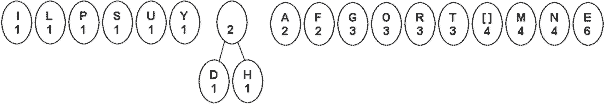

La construction est simple : il suffit de prendre les <b>deux nœuds les moins fréquents (D et H) et de les ajouter comme fils d'un nouveau nœud qui aura pour fréquence la somme des deux</b>.

Il suffit de réitérer cette étape jusqu'à ne plus avoir qu'un seul nœud. Après cela, <b>descendre vers la gauche</b> équivaut à un <b>0</b>, et <b>descendre vers la droite</b> à un <b>1</b>.

On obtient un arbre comme celui-ci :
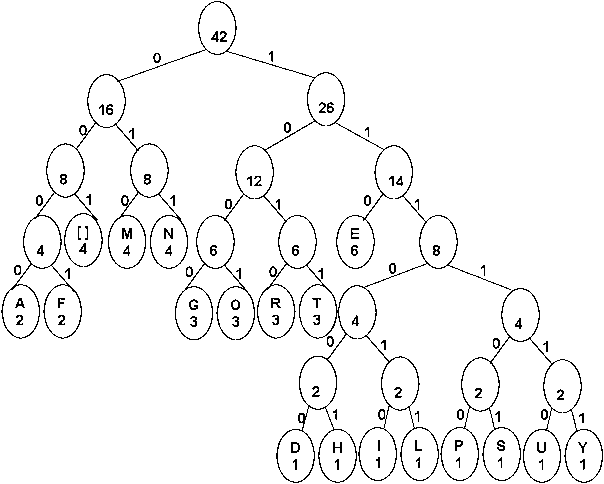

On remarque que chaque <b>caractère</b> occupe <u><b>obligatoirement</b></u> une <b>feuille</b> de l'arbre créé avec <u>une profondeur</u> d'autant <u>plus élevée que son occurrence est faible</u>.
Les noeuds internes permettent de relier les feuilles.

Pour l'encodage, il suffit de lire l'arbre en <u>profondeur</u>. Par exemple, la <b>lettre 'D'</b> est encodée <b>'111000'</b> et la lettre 'e' est encodée <b>'110'</b>. Chose essentielle, <b>aucun code d'une lettre ne doit être le préfixe d'un code d'une autre lettre</b> et cela, l'arbre le permet. En effet, si la lettre 'A' est codée par '0' et que la lettre 'B' est codée par '01', comment l'algorithme pourrait-il deviner que le code '01' correspond bien à la lettre 'B' et non pas à la lettre 'A' et le '1' le début d'un code d'une autre lettre ?

Une <u>vidéo explicative ici</u> (de la 15ème minute à la 25ème minute environ) : https://www.youtube.com/watch?v=6Ma6r8qCd4A

Il est très clair que cet encodage est bien plus concis que l'UTF-8 qui utiliserait 8 bits quelque soit la lettre ! On parvient à un taux de compression entre 30 et 60% selon les textes.

<b><u>Question 2</u></b> : <b>Donner</b> l'encodage des lettres 'I' , 'M' ,'T' et 'Y'.

<b><u>Question 3</u></b> : <b>Etablir</b> l'arbre de Huffman des caractères suivants : 
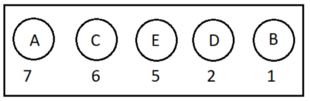



### <u>Appel au professeur (pour vérification)</u>
    

## <u>III/ Programmation de l'algorithme</u>

<b><u>La première étape</u></b> est de repérer les occurrences de chaque caractère.


<b><u>Question 4</u></b> : Ecrire une fonction `calc_occurrences(texte)` qui renvoie un dictionnaire, <b>stockant</b> les <u>caractères présents</u> (<i>clé</i>) avec leurs <u>occurrences</u> (<i>valeur</i>). Il prendra en argument le texte à analyser.

<u>Exemple</u> : dico_brut = { 'A': 3 , 'c' : 4 ...} : cela signifie que le caractère 'A' apparaît trois fois et que le caractère 'c' quatre fois.


<u>Aide</u> : on pensera à la méthode `get(key)` ou l'instruction `in` qui permet de savoir si une clé est déjà présente dans le dictionnaire. Lien : https://python.doctor/page-apprendre-dictionnaire-python

In [ ]:
# Texte à encoder
texte_brut = """Le programme de NSI est très concret : vous allez travailler en petits groupes sur des projets, des défis
logiques à résoudre avec les langages de programmation les plus utilisés en informatique. En général, ce sera
Python (très utilisé pour les robots et les jeux vidéo), mais vous verrez aussi HTML, CSS et Javascript 
qui sont les trois langages de quasiment tous les sites internet, et SQL qui est utilisé pour les grosses bases de données.
Quand on code, on rate et on corrige ! Et c’est comme ça que vous travaillerez avec vos professeurs sur vos projets :
c’est en faisant des erreurs qu’on apprend, et vous devrez améliorer vos programmes au fur et à mesure pour
qu’ils vous obéissent au doigt et à l’œil."""

In [ ]:
# Parcours du texte
def calc_occurrences(texte) :
    # création du dictionnaire 
    dico_brut = {}
    
    ################################################################################
    #################### ECRIRE ICI LE PROGRAMME ###################################
    ################################################################################
    
    # Si le caractère est déjà présent dans le dictionnaire dico_brut : 
    ###########################################
    ############# A COMPLETER #################
    ########################################### 
        
    
    # Si le caractère est une nouvelle clé
    else :
    ###########################################
    ############# A COMPLETER #################
    ###########################################
    
    
    ################################################################################
    
    return dico_brut



# Affichage pour tester
print(calc_occurrences(texte_brut))

<u>Résultats attendus</u> :
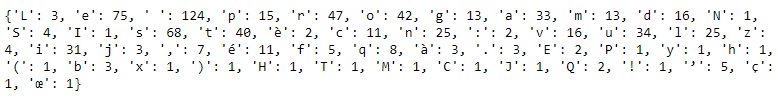
    
### <u>Appel au professeur (si besoin)</u>

<b><u>La seconde étape</u></b> est de construire l'arbre de Huffman. Pour se faire, on utilisera des fonctions auxiliaires (la fonction `calc_occurrences(texte)`en fait partie).

Voici la définition de la classe `Noeud` qui a en attributs :
- `valeur`: c'est l'occurrence d'un caractère (feuille) mais aussi la somme des occurrences des fils (noeuds internes).
- `symbole`: c'est le symbole représentant le caractère. il n'y en a pas pour les noeuds internes.
- `gauche` : présence d'un fils à gauche (`None` sinon).
- `droit`: présence d'un fils à droite (`None`sinon).
- `code`: c'est `0` s'il s'agit d'un fils gauche, `1` pour un fils droit (noeuds internes).

In [ ]:
class Noeud :
    def __init__(self, val, symb, gau = None, dro = None) :
        self.valeur = val
        self.symbole = symb
        self.gauche = gau
        self.droit = dro
        self.code = ''    # Vide par défaut
    

La fonction `calc_codes(noeud, val = '')`doit <b>calculer le code de Huffman de chaque caractère</b>. Il faut donc parcourir les noeuds depuis la racine et ajouter le code associé à chaque noeud interne intermédiaire (`0`pour un fils gauche et `1` pour un fils droit). Pour utiliser cette fonction, l'arbre de Huffman doit bien sûr être construit :)

Le plus simple est d'utiliser la récursivité.
- <u>Cas d'arrêt</u> : le noeud concerné est une feuille donc représente un caractère : on lui associe le code (variable `nouv_valeur`).
- <u>Cas général</u> : le noeud a un fils gauche, on procéde par récursivité sur le noeud gauche avec la nouvelle valeur. Même méthode s'il y a un fils droit.

<b><u>Question 5</u></b> : <b>Compléter</b> la fonction `calc_codes(noeud, val = '')` qui permet de coder chaque caractère (on s'appuiera sur les donées ci-dessus).

In [ ]:
# Dictionnaire associant `symbole` et `code` de chaque noeud
codes = {}

# Calcul du code d'Huffman pour chaque `noeud`
def calc_codes(noeud, val = '') :
    # Code pour chaque feuille en format chaîne de caractère
    nouv_valeur = val + str(noeud.code)
    
    # Cas d'arrêt (cas d'une feuille)
    if ### A COMPLETER ### :
        # Ajout du code du symbole au noeud en question (stockés dans le dictionnaire `codes`) 
        codes[noeud.symbole] = nouv_valeur
    
    
    
    ###########################################
    
    # Cas général (récursivité en cas de présence d'un fils gauche / droit)
    else :
    ###########################################
    ############# A COMPLETER #################
    ###########################################
        
        
    
    ###########################################
            
    return codes
    

Pour le jeu de test, on prendra cet arbre d'Huffman :

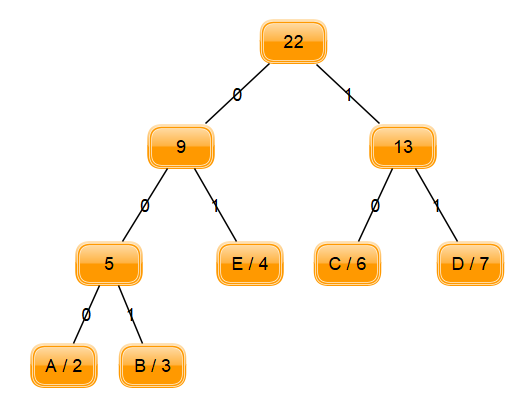

<b><u>Question 5</u> (Suite)</b> : <b>Compléter</b> alors le jeu de test suivant :

In [ ]:
# Voici la programmation de l'arbre de Huffman ci-dessus.
noeud_A = Noeud(2,'A')
noeud_A.code = 0
noeud_B = Noeud(3,'B')
noeud_B.code = 1
noeud_5 = Noeud(5,'',noeud_A,noeud_B)
noeud_5.code = 0
noeud_E = Noeud(4,'E')
noeud_E.code = 1
noeud_9 = Noeud(9, '',noeud_5,noeud_E)
noeud_9.code = 0

###########################################
############# A COMPLETER #################
###########################################    

# Noeud racine
noeud_22 = ##### A COMPLETER ##### 

# Jeu de test
print(calc_codes(noeud_22)) # Attendu : {'A': '000', 'B': '001', 'E': '01', 'C': '10', 'D': '11'}
  

Voici la fonction auxiliaire permettant de lire l'encodage selon l'algorithme d'Huffman :

In [ ]:
def encodage(donnees, code) :
    encodage_sortie = []
    
    for char in donnees :
        # Affichage des données, bit par bit
        print(code[char], end  = '')
        encodage_sortie.append(code[char])
    
    # Transforme la liste en chaîne de caractères (sans les espaces)
    chaine = ''.join([str(item) for item in encodage_sortie])
    
    return chaine 
        

<b><u>La troisième étape</u></b> est de construire l'arbre selon l'algorithme d'Huffman.

Voici un exemple ci-dessous :

In [ ]:
def Huffman(texte) :
    # Accueille l'arbre selon l'algorithme d'Huffman
    noeuds = []
    
    # Calcul des occurrences par caractère (dictionnaire)
    syb_eff = calc_occurrences(texte)
    
    # Récupération de clés / svaleurs séparemment
    symboles = syb_eff.keys()
    effectifs = syb_eff.values()
    
    # Affichage des caractères / occurrences
    print("Caractères",symboles)
    print("Effectifs",effectifs)
    print("\n")
    
    for symbole in symboles:
        noeuds.append(Noeud(syb_eff.get(symbole), symbole))
        
    while len(noeuds) > 1 :
        # Tri des noeuds selon leur fréquence d'apparition
        noeuds = sorted(noeuds,key = lambda x:x.valeur)
        
        # On obtient les deux plus petites fréquences
        gauche = noeuds[0]
        droit = noeuds[1]
        
        # Application du code d'Huffman
        gauche.code = 0
        droit.code = 1
        
        # On combine ces deux noeuds aux plus petites valeurs
        nouv_noeud = Noeud(gauche.valeur + droit.valeur, None, gauche, droit)
        
        # On supprime les deux anciens arbres (ils en forment un seul désormais)
        noeuds.remove(gauche)
        noeuds.remove(droit)
        noeuds.append(nouv_noeud)
    
    # Appel aux fonctions auxiliaires
    huffman_encodage = calc_codes(noeuds[0])
    huffman_texte = encodage(texte_brut,huffman_encodage)
    
    return huffman_texte, noeuds[0] # Renvoie le texte codé (et l'arbre) selon Huffman


# Jeu de tests
texte_code, huffman_arbre = Huffman(texte_brut)
print(texte_code)

On peut calculer le taux de <b>compression</b> par la formule <i>comp = 1 - taille_texte_huffman / taille_texte_brut</i>

<b><u>Question 6</u></b> : <b>Ecrire</b> un script affichant la taux de compression obtenu. 

In [ ]:
################ ECRIRE LE SCRIPT ICI #######################


<u>Résultat attendu</u> : 44% (à l'unité près)

### <u>Appel au professeur (si besoin)</u>

## <u>IV/ Décodage du code d'Huffman</u>

On souhaite maintenant <u>décoder</u> le texte et ainsi vérifier que l'algorithme d'Huffman est <b>réversible</b> et <b>sans perte d'information</b>.

L'algorithme associé est relativement simple : on parcourt l'arbre au gré des `1` (<i>fils droit</i>) et des `0`(<i>fils gauche</i>). Lorsque l'on arrive sur une <b>feuille</b>, il s'agit d'un <b>caractère</b>, il suffit de récupérer le symbole et le tour est joué.

<u>Par étapes</u> :

- On part de la `racine` de l'arbre d'Huffman.
- On parcourt le `texte_code` caractère par caractère.
- Si on trouve `1`, on va au fils droit. S'il vaut `None`, c'est que le noeud en question est une feuille : on récupère le caractère grâce à l'attribut `symbole` et on l'ajoute à la variable `liste_decode`. On n'oublie pas de repartir de la `racine` !
- Si on trouve `0`, on va au fils gauche. Et mêmes remarques que précédemment.

In [ ]:
def decodage(texte_code, huffman_arbre):
    # On stocke la racine de l'arbre.
    racine = huffman_arbre
    # Récupère les caractères dans une liste
    liste_decode = []
    
    # On parcourt chaque bit du texte codé.
    for x in texte_code :
    ###########################################
    ############# A COMPLETER #################
    ###########################################
        
        
        
        
    ###########################################
    
    # Transformation de la liste de caractères en chaîne de caractères.
    car_decode = ''.join([str(item) for item in liste_decode])
    
    return car_decode


# Jeu de tests
# Récupération du texte codé et de l'arbre d'Huffman
texte_code, huffman_arbre = Huffman(texte_brut)

# Vérification du décodage
print("\n",decodage(texte_code,huffman_arbre))  # Attendu : retrouver le texte de départ.

### <u>Appel au professeur (si besoin)</u>

<b><u>Remarque</u></b> : <b>N'hésitez pas à modifier le texte_brut, y compris en langue étrangère !</b>

En pratique, le code d'Huffman est intégré dans des fichiers : il faut donc transcrire l'arbre en entête pour que l'ordinateur puisse reconstruire les informations (texte ou autre). Il est avantageux dans la compression de fichiers plutôt longs et est encore utilisé de nos jours, en parallèle d'autres systèmes de compression avec pertes (images par exemple).